In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing

In [88]:
df=pd.read_csv('monthly-milk-production-pounds-p.csv')
df

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


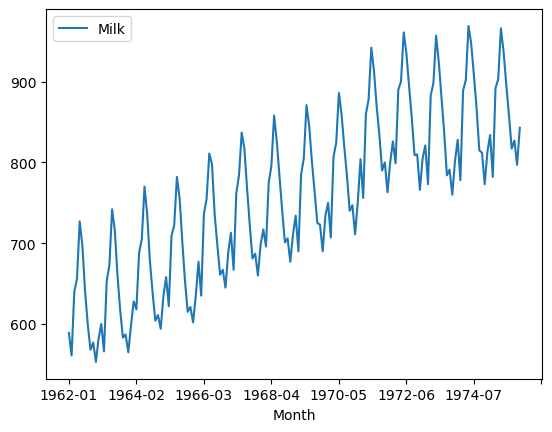

In [3]:
df.plot.line(x='Month',y='Milk')
plt.show()

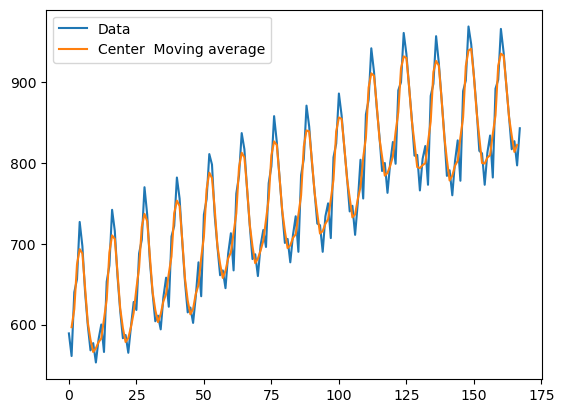

In [8]:
y=df['Milk']
fcast=y.rolling(3,center=True).mean()
plt.plot(y,label='Data')
plt.plot(fcast,label='Center  Moving average')
plt.legend(loc='best')
plt.show()

In [25]:
y_train=df['Milk'][:-12]
y_test=df['Milk'][-12:]
span=3

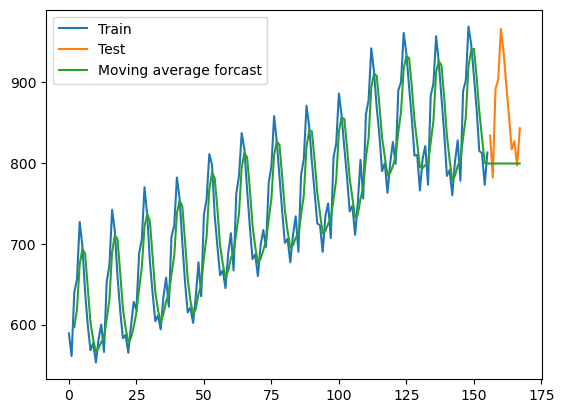

In [26]:
fcast=y_train.rolling(span).mean()
MA=fcast.iloc[-1]
MA_series=pd.Series(MA.repeat(len(y_test)))
MA_fcast=pd.concat([fcast,MA_series],ignore_index=True)
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label='Moving average forcast')
plt.legend(loc='best')
plt.show()

In [27]:
rms=sqrt(mean_squared_error(y_test,MA_series))
rms

83.33766655400582

In [28]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [29]:
ses=SimpleExpSmoothing(y_train)

#### Simple Exponential Smoothing

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


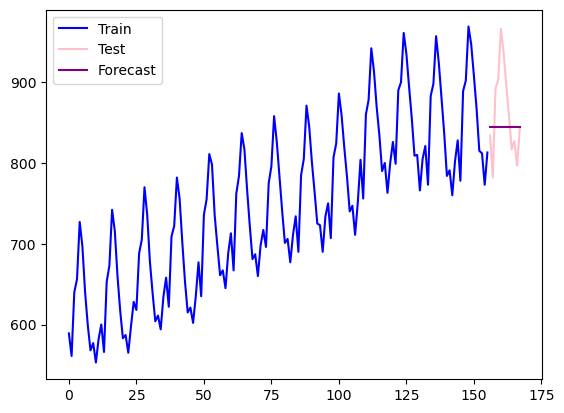

RSME =  57.02407775273818


In [35]:
fit1=ses.fit(smoothing_level=0.1)
fcast1=fit1.forecast(len(y_test))
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc='best')
plt.show()
print("RSME = ",sqrt(mean_squared_error(y_test,fcast1)))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


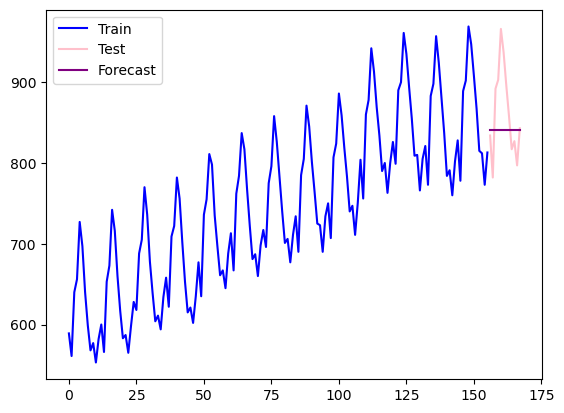

RSME =  58.25348000027227


In [36]:
fit1=ses.fit(smoothing_level=0.15)
fcast1=fit1.forecast(len(y_test))
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc='best')
plt.show()
print("RSME = ",sqrt(mean_squared_error(y_test,fcast1)))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


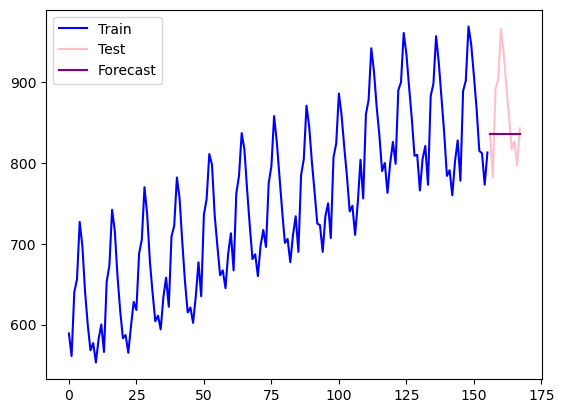

RSME =  60.41719003278307


In [37]:
fit1=ses.fit(smoothing_level=0.2)
fcast1=fit1.forecast(len(y_test))
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc='best')
plt.show()
print("RSME = ",sqrt(mean_squared_error(y_test,fcast1)))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


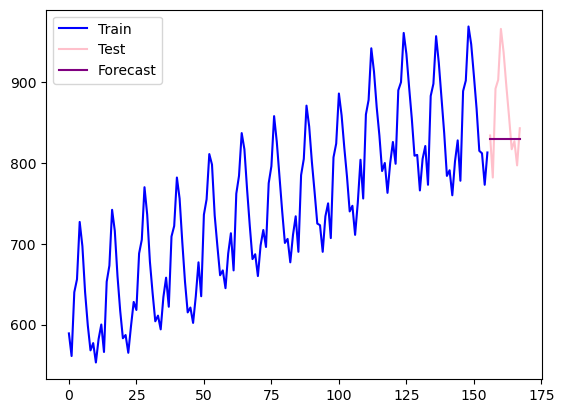

RSME =  63.27043500848841


In [38]:
fit1=ses.fit(smoothing_level=0.25)
fcast1=fit1.forecast(len(y_test))
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc='best')
plt.show()
print("RSME = ",sqrt(mean_squared_error(y_test,fcast1)))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


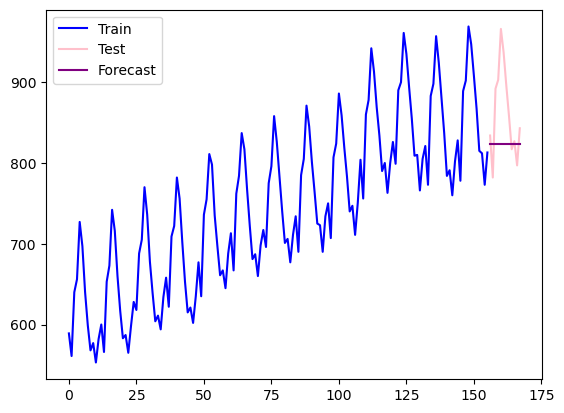

RSME =  66.49878205261881


In [39]:
fit1=ses.fit(smoothing_level=0.3)
fcast1=fit1.forecast(len(y_test))
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc='best')
plt.show()
print("RSME = ",sqrt(mean_squared_error(y_test,fcast1)))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


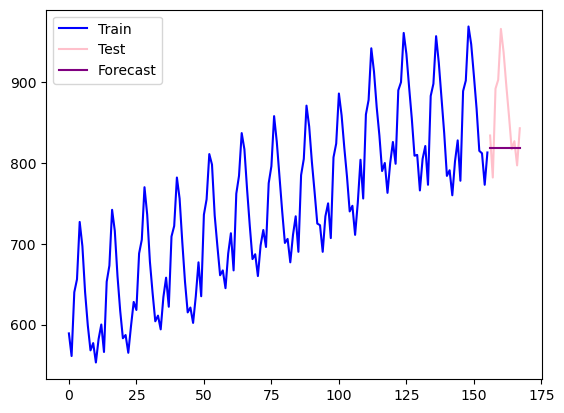

RSME =  69.73212624061597


In [40]:
fit1=ses.fit(smoothing_level=0.35)
fcast1=fit1.forecast(len(y_test))
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc='best')
plt.show()
print("RSME = ",sqrt(mean_squared_error(y_test,fcast1)))

####  Holt Linear trend

In [56]:
from statsmodels.tsa.api import Holt

In [42]:
holt=Holt(y_train)

In [61]:
alpha=0.8
beta=0.02

In [48]:
fit1=holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1=fit1.forecast(len(y_test))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


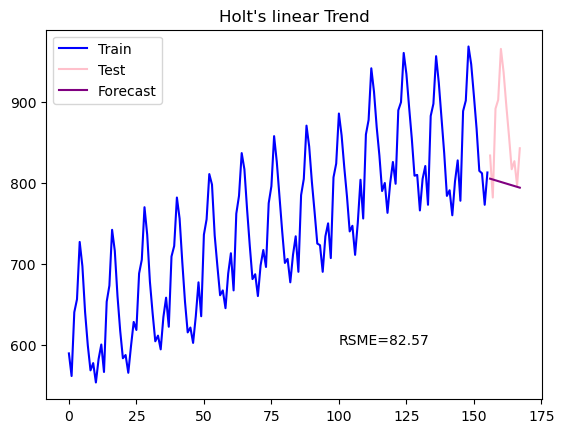

In [51]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,600,"RSME="+str(error))
plt.title("Holt's linear Trend")
plt.legend(loc='best')
plt.show()

# Holt exponential

In [52]:
holt=Holt(y_train,exponential=True)
fit1=holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1=fit1.forecast(len(y_test))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


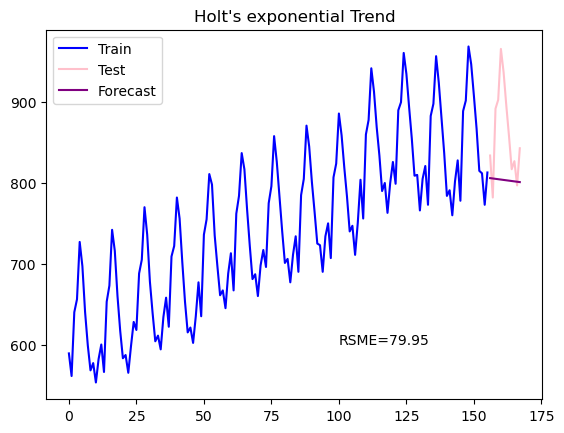

In [53]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,600,"RSME="+str(error))
plt.title("Holt's exponential Trend")
plt.legend(loc='best')
plt.show()

# Additive damp trend

In [54]:
phi=0.1

In [63]:
add_damp=Holt(y_train,damped_trend=True)
fit3=add_damp.fit(smoothing_level=alpha,smoothing_trend=beta,damping_trend=phi)
fcast3=fit3.forecast(len(y_test))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


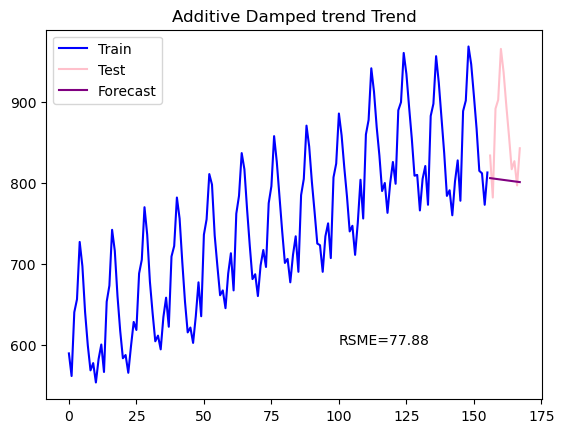

In [64]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=round(sqrt(mean_squared_error(y_test,fcast3)),2)
plt.text(100,600,"RSME="+str(error))
plt.title("Additive Damped trend Trend")
plt.legend(loc='best')
plt.show()

# Multiplicative damped trend

In [65]:
add_damp=Holt(y_train,damped_trend=True,exponential=True)
fit3=add_damp.fit(smoothing_level=alpha,smoothing_trend=beta,damping_trend=phi)
fcast3=fit3.forecast(len(y_test))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


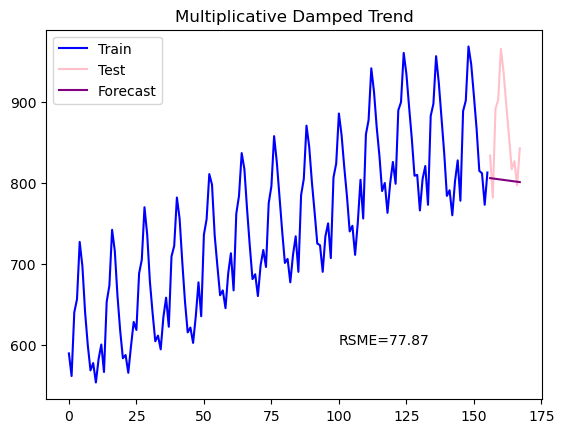

In [66]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=round(sqrt(mean_squared_error(y_test,fcast3)),2)
plt.text(100,600,"RSME="+str(error))
plt.title("Multiplicative Damped Trend")
plt.legend(loc='best')
plt.show()

# Seasonal Additive

In [67]:
gamma=0.1

In [75]:
hw_add=ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add')

In [76]:
fit1=hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast1=fit1.forecast(len(y_test))

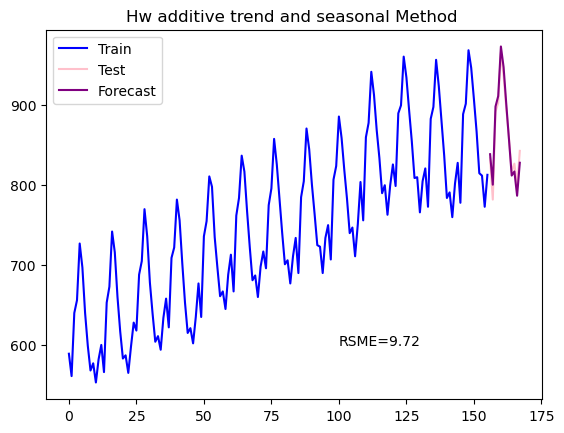

In [77]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,600,"RSME="+str(error))
plt.title("Hw additive trend and seasonal Method ")
plt.legend(loc='best')
plt.show()

# Seasonal multiplicative

In [78]:
hw_add=ExponentialSmoothing(y_train,seasonal_periods=12,trend='mul',seasonal='mul')
fit1=hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
fcast1=fit1.forecast(len(y_test))

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


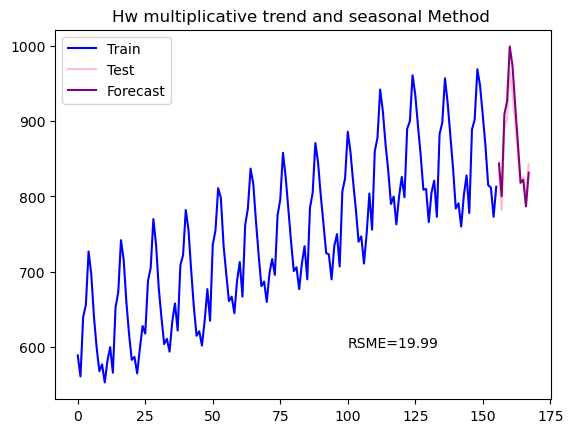

In [79]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,600,"RSME="+str(error))
plt.title("Hw multiplicative trend and seasonal Method ")
plt.legend(loc='best')
plt.show()

# Seasonal damped Additive

In [84]:
hw_add=ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add',damped=True)
fit1=hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma,damping_trend=phi)
fcast1=fit1.forecast(len(y_test))

/tmp/ipykernel_51182/434266394.py:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_add=ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add',damped=True)


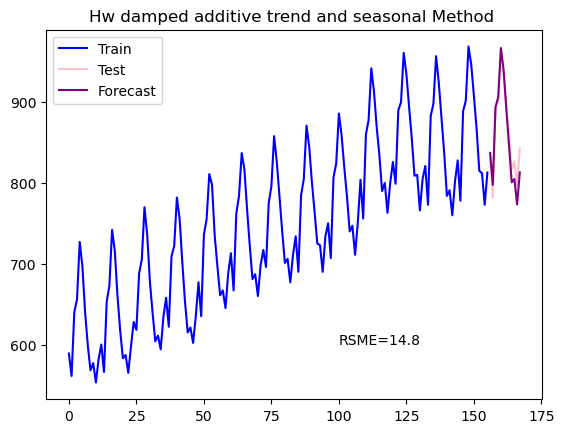

In [85]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,600,"RSME="+str(error))
plt.title("Hw damped additive trend and seasonal Method ")
plt.legend(loc='best')
plt.show()

# Seasonal damped Multiplicative

In [86]:
hw_add=ExponentialSmoothing(y_train,seasonal_periods=12,trend='mul',seasonal='mul',damped=True)
fit1=hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma,damping_trend=phi)
fcast1=fit1.forecast(len(y_test))

/tmp/ipykernel_51182/3314833021.py:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hw_add=ExponentialSmoothing(y_train,seasonal_periods=12,trend='mul',seasonal='mul',damped=True)


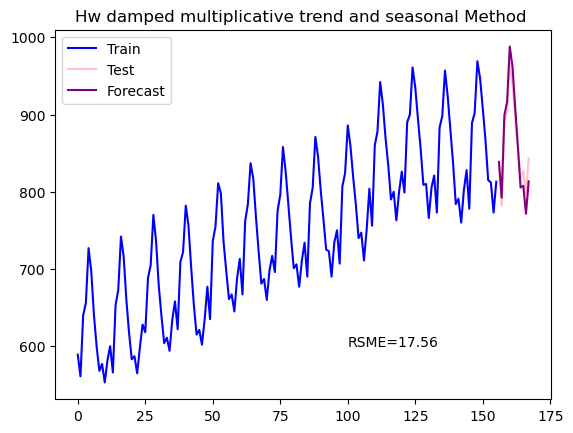

In [87]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,600,"RSME="+str(error))
plt.title("Hw damped multiplicative trend and seasonal Method ")
plt.legend(loc='best')
plt.show()